In [9]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score

# def linear_regression_california():
#     housing = fetch_california_housing(as_frame=True)
#     X = housing.data[["AveRooms"]] 
#     y = housing.target 

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     plt.scatter(X_test, y_test, color="blue", label="Actual")
#     plt.plot(X_test, y_pred, color="red", label="Predicted")
#     plt.xlabel("Average number of rooms (AveRooms)")
#     plt.ylabel("Median value of homes ($100,000)")
#     plt.title("Linear Regression - California Housing Dataset")
#     plt.legend()
#     plt.show()

#     print("Linear Regression - California Housing Dataset")
#     print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
#     print("R^2 Score:", r2_score(y_test, y_pred))


# def polynomial_regression_auto_mpg():
#     url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
#     column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
#     data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?")
#     data = data.dropna()

#     X = data["displacement"].values.reshape(-1, 1) 
#     y = data["mpg"].values

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
#     poly_model.fit(X_train, y_train)

#     y_pred = poly_model.predict(X_test)

#     plt.scatter(X_test, y_test, color="blue", label="Actual")
#     plt.scatter(X_test, y_pred, color="red", label="Predicted")
#     plt.xlabel("Displacement")
#     plt.ylabel("Miles per gallon (mpg)")
#     plt.title("Polynomial Regression - Auto MPG Dataset")
#     plt.legend()
#     plt.show()

#     print("Polynomial Regression - Auto MPG Dataset")
#     print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
#     print("R^2 Score:", r2_score(y_test, y_pred))


# if __name__ == "__main__":
#     print("Demonstrating Linear Regression and Polynomial Regression\n")
#     linear_regression_california()
#     polynomial_regression_auto_mpg()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score 


In [28]:
housing=fetch_california_housing(as_frame=True)
type(housing)


sklearn.utils._bunch.Bunch

In [29]:
housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
X=housing.data[["AveRooms"]]
y=housing.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
type(X)
X.shape

(20640, 1)

In [31]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)
y_pred

array([2.08214377, 2.05867905, 2.05972281, ..., 2.09243659, 2.087511  ,
       2.08060904])

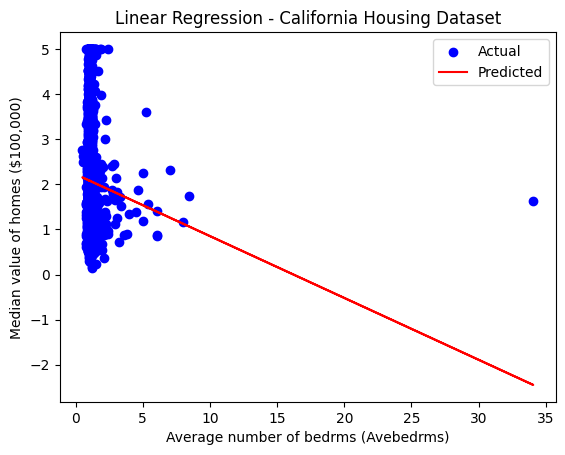

In [34]:
plt.scatter(X_test,y_test,color="blue",label="Actual")
plt.plot(X_test,y_pred,color="red",label="Predicted")
plt.xlabel("Average number of bedrms (Avebedrms)")
plt.ylabel("Median value of homes ($100,000)")
plt.title("Linear Regression - California Housing Dataset")
plt.legend()
plt.show()

In [35]:
mean_squared_error(y_test,y_pred)

1.3108875538359483

polynomial

In [39]:
data=pd.read_csv(r"E:\6th sem\GEN AI\ML_Lab\ML_IA\auto+mpg\auto-mpg.data",sep='\s+',names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin"],na_values="?")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [41]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
data=data.dropna()
data

Single vs. Double Brackets:

housing.data[["AveRooms"]] (double brackets) returns a DataFrame with one column, which is 2D and ready for scikit-learn.
data["displacement"] (single brackets) returns a Series, which is 1D and needs reshaping to become 2D.
Dataset Loading:
In linear_regression_california(), fetch_california_housing(as_frame=True) returns housing.data as a DataFrame, so [["AveRooms"]] is a natural way to select a single feature while keeping the 2D structure.
In polynomial_regression_auto_mpg(), you manually load the Auto MPG dataset into a DataFrame and extract "displacement" as a Series, requiring .values.reshape(-1, 1).

In [51]:
X=data['displacement'] #series
X=data["displacement"].values #ndarray


In [70]:
X=data["displacement"].values.reshape(-1,1)
y=data['mpg'].values
# or
# X=data[['displacement']]
# type(X)
# X.shape



In [74]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

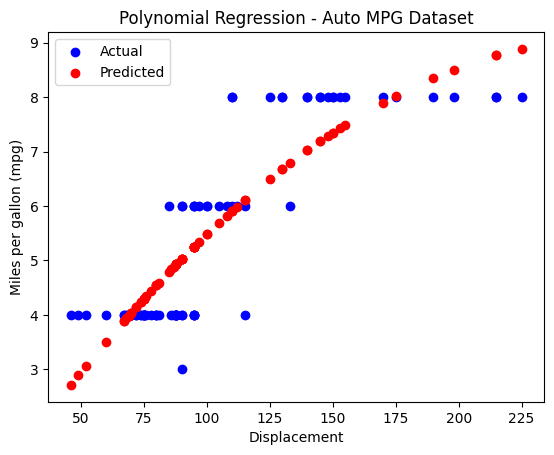

In [77]:
y_pred = poly_model.predict(X_test)

plt.scatter(X_test,y_test,color="blue",label="Actual")
plt.scatter(X_test,y_pred,color="red",label="Predicted")
plt.xlabel("Displacement")
plt.ylabel("Miles per gallon (mpg)")    
plt.title("Polynomial Regression - Auto MPG Dataset")
plt.legend()
plt.show()
